<a href="https://colab.research.google.com/github/JNSDKV/Zomato_Restaurant_Clustering_And_Sentiment_Analysis/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** PERWEZ ALAM

# **Project Summary -**

The goal of this project is to analyze data from 105 Zomato restaurants in Hyderabad in order to cluster them into different segments that can be used to help customers find the best restaurant in their area and for the company to improve in areas where they may be lacking. We used two different models for our analysis: a clustering model using K Means and Agglomerative Hierarchical Clustering algorithms, and a sentiment analysis model using various classification algorithms such as Decision Tree, Random Forest, K-Nearest Neighbors, SVM, Logistic Regression, XGboost, Multinomial Naive Bayes, and Light Gradient Boosting Machines.

The data was provided to us in two datasets, one containing the names of the restaurants and the other containing their reviews. We used different methods to deal with missing values and manipulated columns to prepare the data for analysis. After performing exploratory data analysis and necessary feature engineering, we used NLP techniques for textual data preprocessing for the sentiment analysis model.

For clustering, we used K Means and Agglomerative Hierarchical Clustering algorithms to group the Zomato restaurants into different segments. We also built a sentiment analysis model to classify reviews as positive or negative and used word clouds to visualize the most frequent words in each category. Finally, we built several classification models and selected the best one based on evaluation metrics.

# **GitHub Link -**

https://github.com/JNSDKV/Zomato_Restaurant_Clustering_And_Sentiment_Analysis/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb

# **Problem Statement**


The Zomato clustering project aims to analyze restaurant data in various cities of India to cluster them into different segments and analyze customer sentiments through reviews. The project intends to help customers find the best restaurant in their locality and assist the company in improving areas where they lack. By using cost vs. benefit analysis, valuable information around cuisine and pricing can be identified. Additionally, metadata of reviewers can be used to identify industry critics.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# ignore warnings
import warnings    
warnings.filterwarnings('ignore')

# Modules for dataframe and ndarrays and maths
import pandas as pd
import numpy as np
from datetime import datetime
import math
from scipy.stats import *


# visualisation packages
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import matplotlib.cm as cm
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize':(15,6),'figure.dpi':70})
import missingno as msno #(import for missing value visualization)

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1= pd.read_csv('/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv')
df2= pd.read_csv('/content/drive/MyDrive/Zomato Restaurant reviews.csv')

### Dataset First View

In [4]:
# Dataset First Look
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
df2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df1.shape

(105, 6)

In [7]:
df2.shape

(10000, 7)

### Dataset Information

In [8]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
df1.duplicated().sum()


0

In [11]:
df2.duplicated().sum()

36

In [12]:
df2.drop_duplicates(inplace=True)

In [13]:
df2.duplicated().sum()

0

#### Missing Values/Null Values

In [14]:
#Checking Null Values in first dataframe
df1.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [15]:
null_df1= pd.DataFrame({"Total Values": df1.shape[0] , "Total Null values": df1.isnull().sum(),"%a of Null values" : round((df1.isnull().sum()/ df1.shape[0])*100 , 2) })
null_df1.sort_values("Total Null values" , ascending = False)

,Total Values,Total Null values,%a of Null values
Collections,105,54,51.43
Timings,105,1,0.95
Name,105,0,0.00
Links,105,0,0.00
Cost,105,0,0.00
Cuisines,105,0,0.00


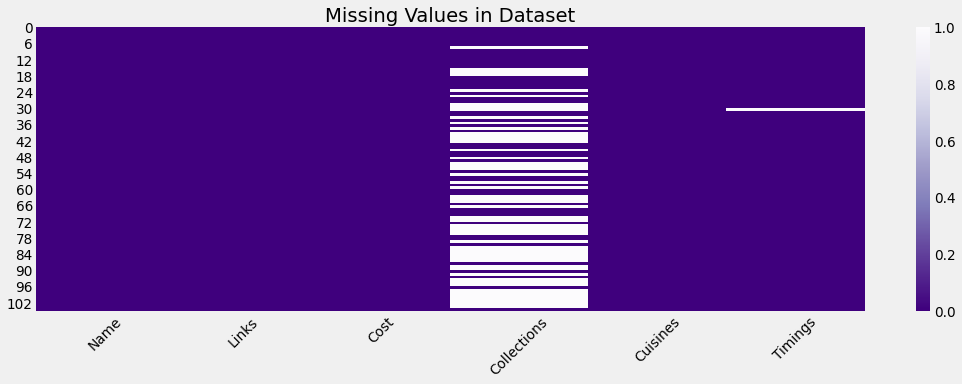

In [18]:
# Visualizing the missing values
plt.figure(figsize=(17, 5))
sns.heatmap(df1.isnull(),cbar=True,cmap="Purples_r")
plt.xticks(rotation= 45)
plt.title('Missing Values in Dataset')
plt.show()

In [19]:
#Checking Null Values in second dataframe
df2.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [20]:
null_df2= pd.DataFrame({"Total Values": df2.shape[0] , "Total Null values": df2.isnull().sum(),"%a of Null values" : round((df2.isnull().sum()/ df2.shape[0])*100 , 2) })
null_df2.sort_values("Total Null values" , ascending = False)

,Total Values,Total Null values,%a of Null values
Review,9964,9,0.09
Reviewer,9964,2,0.02
Rating,9964,2,0.02
Metadata,9964,2,0.02
Time,9964,2,0.02
Restaurant,9964,0,0.00
Pictures,9964,0,0.00


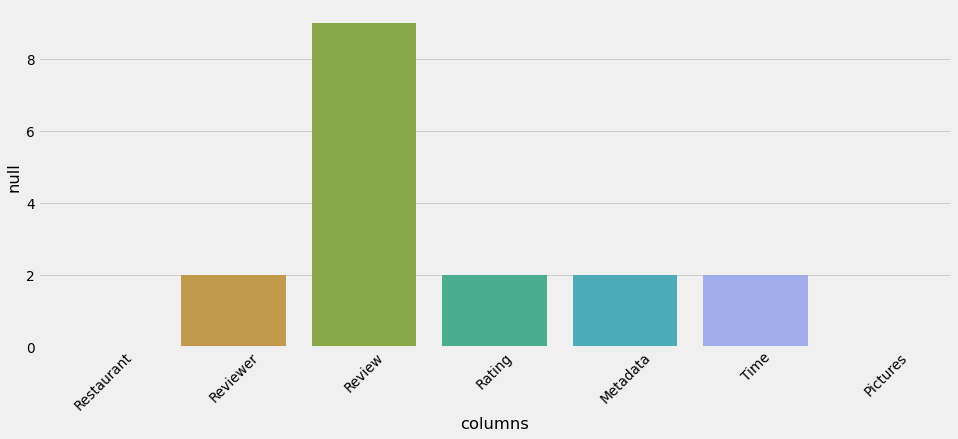

In [21]:
# Visualisation of null values 
null = df2.isnull().sum().reset_index()
null.rename(columns = {'index':'columns', 0:'null'}, inplace = True)
sns.barplot(x = 'columns',
             y = 'null',
            data = null)
plt.xticks(rotation= 45)
plt.show()

### What did you know about your dataset?

As per our intial overview of data we have following observation:
* We have 2 datasets zomato restaurant names and metadata(df1) and zomato restaurant reviews data(df2).
* There are 105 rows in df1 and 6 columns in the df1 namely 'Name', 'Links', 'Cost', 'Collections', 'Cuisines'and 'Timings'.
* There are 10000 rows in df1 and 7 columns in the df2 namely 'Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time' and 'Pictures'
* Majority of the columns are textual.
* There are 36 duplicated instances in df2 and no duplicated instances in df1.
* We noticed that there were 2 columns Collections(54) and Timmings(1) in df1 whereas 4 columns Reviewer(9), Review(2), Rating(2), Metadata(2) and Time(2) in df2.

## ***2. Understanding Your Variables***

In [22]:
# Dataset Columns
df1.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [23]:
df2.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [24]:
# Dataset Describe 
df1.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [25]:
df2.describe(include='all').round(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,9964,9962,9955,9962,9962,9962,9964.00
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.75
std,NaN,NaN,NaN,NaN,NaN,NaN,2.57
min,NaN,NaN,NaN,NaN,NaN,NaN,0.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.00


### Variables Description 

**Zomato Resturant Names dataset:**

1. Name:
 * It tells the name of Restaurants 
 * There are 105 restaurants in the dataset
2. Links:

 * It consists URL Links of Restaurants
 * The URL includes information about the restaurant, including the city name and location within the city.
 * It is observed that 104 restaurants in the dataset are located in the Gachibowli region of Hyderbad, while only one restaurant is located in The Tilt Bar Republic.
3. Cost:

 * It depicts  Per person estimated Cost of dining.
 * The costs are in string format and must be changed to integers by eliminating the ",".
4. Collections:

 * It shows the Tagging of Restaurants w.r.t. Zomato categories
 * 51.4% data is missing for collection column
5. Cuisines:

 * It shows the variety of Cuisines served by each Restaurants

6. Timings:

 * It displays the restaurant's opening and closing times.
 * It is observed that almost all the restaurants are approximately active from 12 noon to 12 at the midnight. Hence this attribute wouldn't be significant in the analysis.

**Zomato Resturant Review dataset:** 
1. Restaurant:

 * It depicts the name of the restaurant for which customers have left reviews.
2. Reviewer:

 *  It consists Name of the Reviewer who have left the reviews
 * There are 2 such instances for which the name of the customer/ reviewer is missing

3. Review:
 * It contains information from customer reviews regarding each restaurant's ambience, service, meals, and overall experience. It can be utilised for restaurant sentiment analysis.
 * There are 9 such instances for which the reviewes from the customer/ reviewer is missing.
4. Rating:

 * It has the Rating Provided by Reviewer ranging from 0 to 5.
 * There are 2 instances with missing values

5. Metadata:
 * Reviewer Metadata - No. of Reviews by each reviewer and followers separated by ",". It can be converted into two integer columns by removing the comma. There are 2 missing values.

6.  Time:
* It shows Date and Time of Review which should be converted from string format to datetime format. There are 2 missing values.

7. Pictures:
 * It contains information about whether or not the reviewers uploaded any pictures

### Check Unique Values for each variable.

In [78]:
# Check Unique Values for each variable.
list_df1 = ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
list_df2 = ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures']

In [79]:
# Check Unique Values for each variable.
print("Unique values in these Retaurenat dataset in each columns: \n")
for i in list(df1.columns):
  print(f'Unique values in {i}---------->>  {df1[i].unique()}')
  print('-----------------------------------------------------------------------------------------------------------------')

Unique values in these Retaurenat dataset in each columns: 

Unique values in Name---------->>  ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Ki

In [80]:
# Check Unique Values in each columns of review dataset.
print("Unique values in these Retaurenat dataset in each columns: \n")
for i in list(df2.columns):
  print(f'Unique values in {i}---------->>  {df2[i].unique()}')
  print("--------------------------------------------------------------------------------------------------------")

Unique values in these Retaurenat dataset in each columns: 

Unique values in Restaurant---------->>  ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Mons

## 3. ***Data Wrangling***

### Data Wrangling Code

**Timings**

In [81]:
#Impute one missing timing row with the mode
df1['Timings'].fillna(df1['Timings'].mode()[0],inplace=True)

**Collections**

In [82]:
#droping collections column 
df1.drop('Collections', axis=1, inplace=True)

**Cost**

In [83]:
# changing the datatype of cost columns
df1['Cost'] = df1['Cost'].str.replace(',','')
df1['Cost'] = df1['Cost'].astype('int')

**Review**

In [84]:
#dropping rows in which review field is null
df2.dropna(subset = ["Review"], inplace=True)

**Rating**

In [85]:
# correcting and changing the datatype of Rating column
df2['Rating'] = df2['Rating'].replace('Like','4')
df2['Rating'] = df2['Rating'].astype('float')

**Time**

In [86]:
# changing the datatype of Time from object to datetime
df2['Time'] = pd.to_datetime(df2['Time'])

In [87]:
# checking for the corrections made in restaurant dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Links     105 non-null    object
 2   Cost      105 non-null    int64 
 3   Cuisines  105 non-null    object
 4   Timings   105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [88]:
# checking for the corrections made in review dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9955 non-null   object        
 1   Reviewer    9955 non-null   object        
 2   Review      9955 non-null   object        
 3   Rating      9955 non-null   float64       
 4   Metadata    9955 non-null   object        
 5   Time        9955 non-null   datetime64[ns]
 6   Pictures    9955 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 622.2+ KB


**Cuisines**

In [89]:
# changing the cuisenes from string object to list obeject
list_of_cuisins = df1.Cuisines.str.split(', ')

df1['Cuisines_list'] = pd.Series()

for i in range(len(df1)):
  df1['Cuisines_list'][i] = list_of_cuisins[i]

In [90]:
# adding another column called Total Cusines which counts total number of cuisines
df1['Total Cuisines'] = df1['Cuisines_list'].apply(lambda x : len(x))


**Links**

In [91]:
# link value
df1.loc[0,'Links']

'https://www.zomato.com/hyderabad/beyond-flavours-gachibowli'

In [92]:
#function to extract location of the restaurant
def location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
df1['Location'] = df1['Links'].apply(location)

In [93]:
# counting the locations 
df1.Location.value_counts()

hyderabad             104
thetiltbarrepublic      1
Name: Location, dtype: int64

In [94]:
# dropings links after extracting location
df1.drop(['Links'],axis=1,inplace=True)

**Metadata**

In [95]:
# creating to columns namely No. of reviews and Followers by extracting from metadata column
df2['No. of Reviews'],df2['Followers']=df2['Metadata'].str.split(',').str
df2['No. of Reviews'] = pd.to_numeric(df2['No. of Reviews'].str.split(' ').str[0])
df2['Followers'] = pd.to_numeric(df2['Followers'].str.split(' ').str[1])
df2 = df2.drop(['Metadata'], axis = 1)
df2.dtypes

Restaurant                object
Reviewer                  object
Review                    object
Rating                   float64
Time              datetime64[ns]
Pictures                   int64
No. of Reviews             int64
Followers                float64
dtype: object

### What all manipulations have you done and insights you found?

Based on the initial overview of both the dataset we did following imputations to make our dataset analysis ready:




1.   **Timings**:
 Dropping this column since most of the restaurants have same timings in which they operate , so it will not yield any useful information for analysis.
2.  **Collections**:  Dropping this column because more than 50% of the data are missing in this particular column.
3. **Cost**: Since this column is in object datatype with comma seperated format. We first eliminated the comma from the numbers then we changed the datatype from object to int.
4. **Review**: This column contained null values in some rows so we eliminated those rows which had null values.
5. **Rating**:When we checked the unique values, we discovered that there was an incorrect entry called 'Like,' which was replaced by 4, assuming that someone had liked the restaurant and then we changed the datatype to float.
6. **Time**: We changed the datatype from object to datetime in this column.
7. **Cusines**: It was intially given in class string with comma seperated format , we imputed it with class list so that can be useful for us in extracting different cusines in the same restaurant. We also created another column which represents total cuisines in a particular restaurant.
8. **Links** : From the given Url we extracted the location of the restaurants by string using string indexing. We realised that 104 restaurants were from the same Gachibowli, Hyderabad location and 1 restaurant was from Thetitlebarrepublic location.
9. **Metadata** : We created two columns i.e No. of reviews and followers from the given Metadata by extracing information from it.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

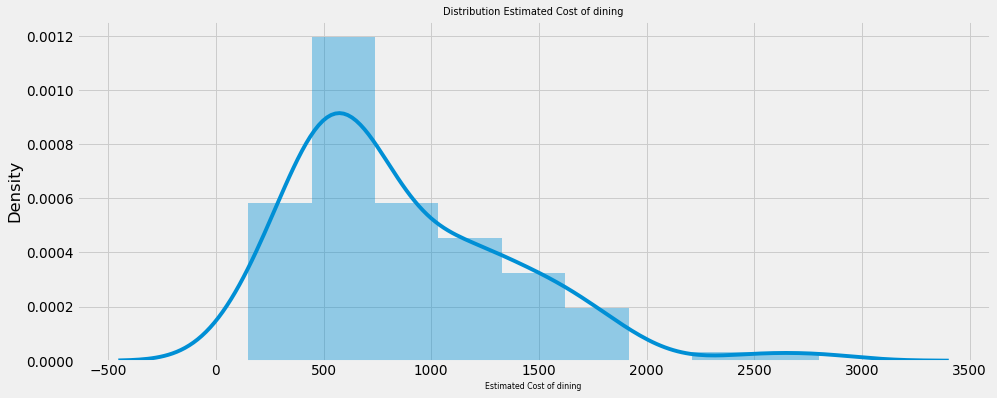

In [97]:
#distribution of Cost of Dining 
sns.distplot(x=df1['Cost'])
plt.xlabel('Estimated Cost of dining',size=8)
plt.title('Distribution Estimated Cost of dining',size=10)
plt.show()

##### 1. Why did you pick the specific chart?

DISTRIBUTION PLOT

Cost is a numerical feature, and we utilised a distribution plot to see how the cost of dining varied across all restaurants.

##### 2. What is/are the insight(s) found from the chart?

From the distribution curve it can be observed that most of restaurants have cost of dinning in the ranging from Rs.200-Rs.1000 and the median cost is around Rs.700

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This finding regarding the cost distribution can be useful in grouping clients based on their dining costs.

#### Chart - 2

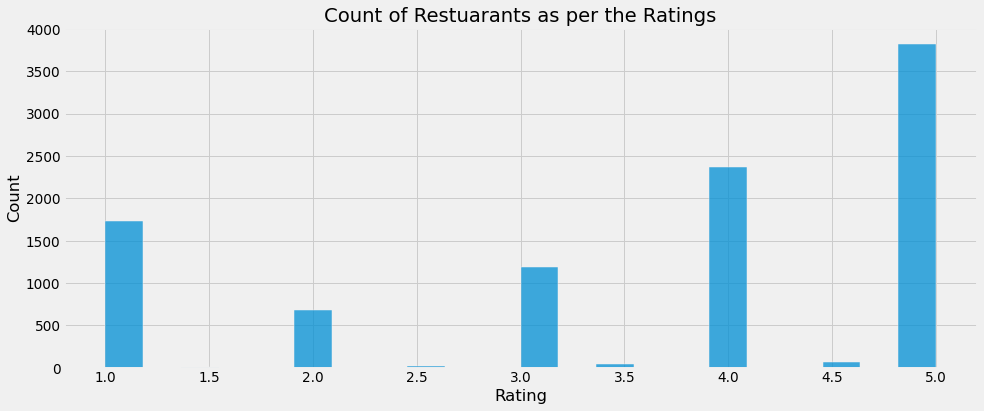

In [98]:
# frequency distribution of Ratings
sns.histplot(x= df2['Rating'])
plt.xlabel('Rating')
plt.title('Count of Restuarants as per the Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

HISTOGRAM

We picked histogram because we needed to count the number of restaurants based on the ratings given by the reviewers.

##### 2. What is/are the insight(s) found from the chart?

From the univariate analysis of ratings column it is evident that most of the restaurants have been rated 5 followed by  ratings of 4

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see there are alot of restaurants with ratings 1 to 3 that need to improved overall specifically restaurants with 1 rating.

#### Chart - 3

In [99]:
# merging the two dataet
df_merged= df1.merge(df2, how='inner', left_on='Name', right_on='Restaurant')
df_merged.head(1)

,Name,Cost,Cuisines,Timings,Cuisines_list,Total Cuisines,Location,Restaurant,Reviewer,Review,Rating,Time,Pictures,No. of Reviews,Followers
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","[Chinese, Continental, Kebab, European, South ...",6,hyderabad,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0


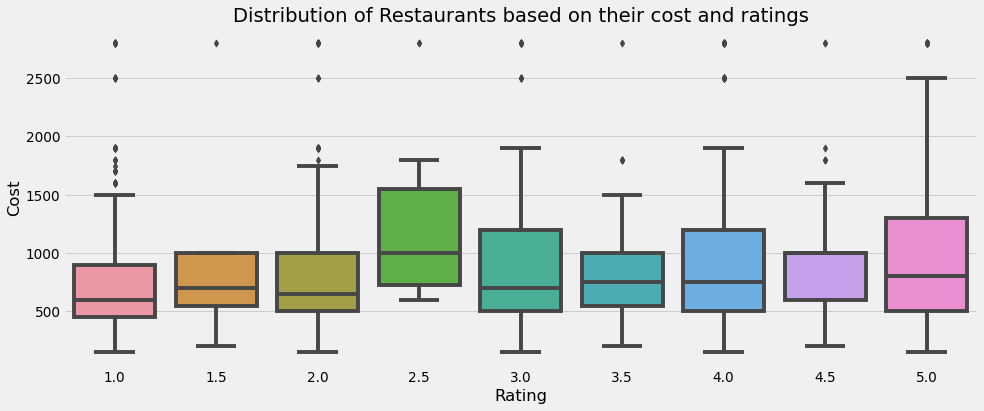

In [106]:
sns.boxplot(x=df_merged.Rating, y=df_merged.Cost)
plt.title("Distribution of Restaurants based on their cost and ratings")
plt.xlabel("Rating")
plt.ylabel("Cost")
plt.show()

##### 1. Why did you pick the specific chart?

We used boxplot here as we wanted to know the spread of costs of the restaurants across the different rated restaurants. Boxplot is used here to know the statistical distribution including  median and the different quartiles of the data.

##### 2. What is/are the insight(s) found from the chart?

From the bivariate analysis of the Ratings and Cost columns we got to know that people do not prefer costly restaurants. 
* Some of the costly restaurants have very less ratings and some of them do have a good rating.

* The average cost of all type of rated restaurants are almost close to each other

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see, there isn't a lot of information available on costly restaurants. Most likely because many individuals want to pay less, but we can also see that the Rating 5.0 box is the most vertically elongated, implying that many do not dine in expensive places. They don't go there very often, but the few times they do, they're satisfied.

#### Chart - 4

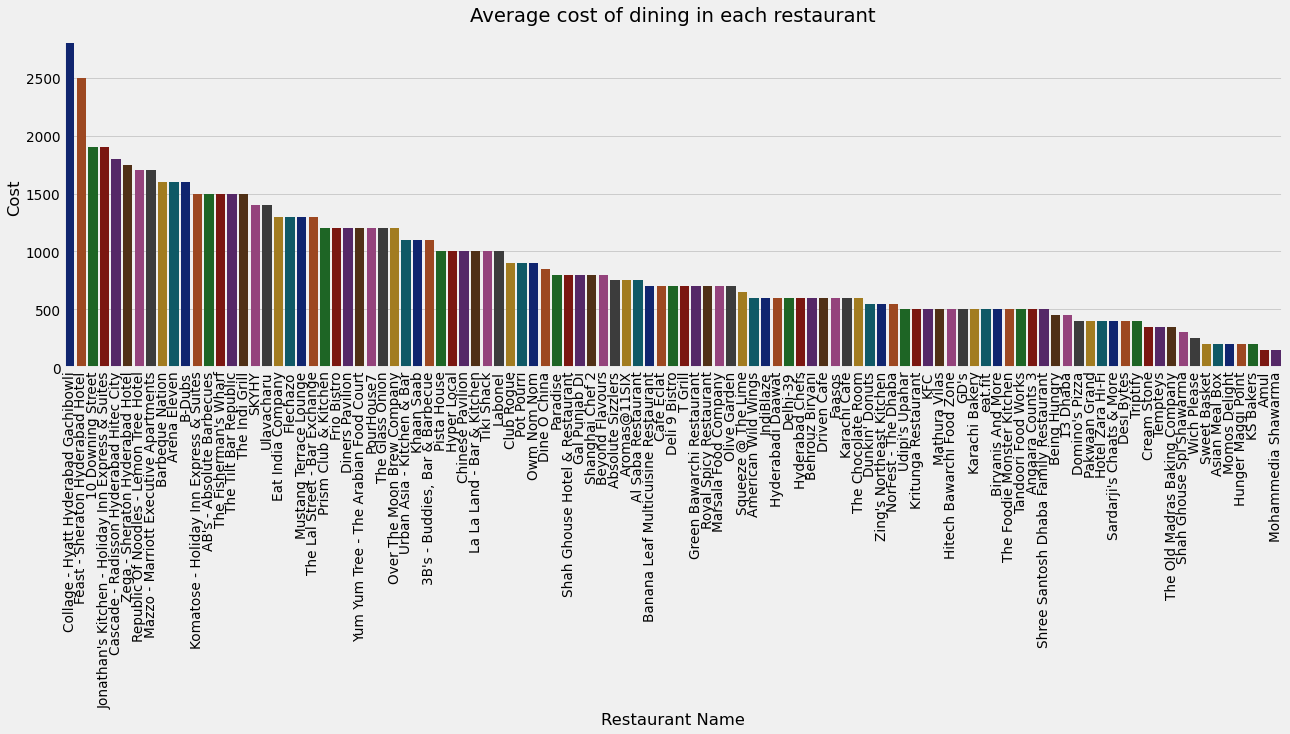

In [107]:
# average cost of each restaurant
avg_cost_vs_rest= df1.groupby(['Name'])['Cost'].mean().sort_values(ascending=False).reset_index()
avg_cost_vs_rest.sort_values(by = 'Cost',ascending = False,inplace = True)

# plotting bar chart for average cost in each restaurant
fig = plt.figure(figsize=[20,6])
sns.barplot(data=avg_cost_vs_rest, x='Name', y= 'Cost',palette = 'dark')
plt.title("Average cost of dining in each restaurant")
plt.xlabel('Restaurant Name')
plt.xticks(rotation=90)
plt.ylabel('Cost')
plt.show()

##### 1. Why did you pick the specific chart?

Bar Chart

We are choosing bar chart to visualize the average cost in all 105 restaurant. Since it is bivariate analysis with large number of categories bar chart will be a natural choice. 

##### 2. What is/are the insight(s) found from the chart?

We can observe from the chart that College hyatt gachibowli restaurant has the highest average cost and Mohommadia Shawarma has the least average cose. Other than that we can visualize the average cost in descending order form the chart.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes from the above chart a customer can identify best suited restaurant for them based on the budget. Also the restaurant owners can assess their standings in the market and reconsider thier price point with respect to their competitors.

#### Chart - 5

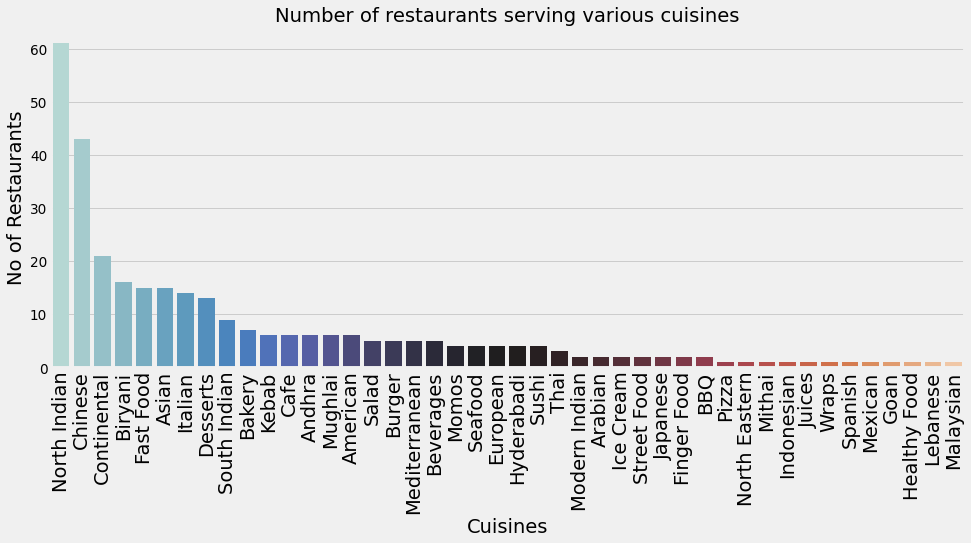

In [111]:
# creating a dataframe with columns as Cuisines name and cusisines count 
diff_cuisines = {}
for names in list(df1['Cuisines_list']):
    for name in names:
        if name in diff_cuisines:
            diff_cuisines[name] += 1
        else:
            diff_cuisines[name] = 1

cuisines_df = pd.DataFrame(diff_cuisines.values(), index=diff_cuisines.keys(), columns=['cuisines_counts']).reset_index()
cuisines_df.sort_values(by='cuisines_counts', ascending=False, inplace=True)
cuisines_df.rename(columns={'index': 'cuisines_name', 'cuisines_counts': 'cuisines_counts'}, inplace=True)

# plotting bar chart for Number of restaurants serving various cuisines
fig = plt.figure(figsize=[15, 6])
sns.barplot(data=cuisines_df, x='cuisines_name', y='cuisines_counts', palette='icefire')
plt.title("Number of restaurants serving various cuisines")
plt.xlabel('Cuisines', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.ylabel('No of Restaurants', fontsize=20)
plt.show()


##### 1. Why did you pick the specific chart?

BARPLOT

We have chosen Bar chart to visualize the count of restaurants serving a particular cuisine

##### 2. What is/are the insight(s) found from the chart?

* North Indian is served in the highest number of restaurants in Hyderabad followed by Chinese and Continental.
* Healthy Food, Labanese and Malaysian is served in least number of restaurants

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Cusines served by a few restaurants have clearly less demand in the market, so if the stakeholders will adopt some marketing strategy to increase the visibility of these cuisines, along with providing these cuisines at discounted rates, it may prove to be beneficial to the business.

#### Chart - 6

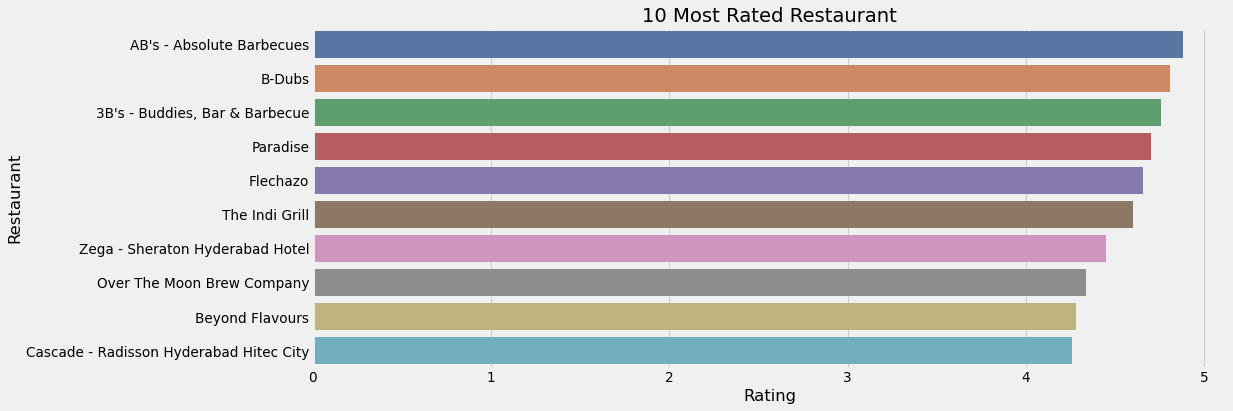

In [115]:
#Will check best restaurants in terms of rating
top_restaurants= df2.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='Rating', y='Restaurant', data=top_restaurants.sort_values(ascending=False, by='Rating')[:10],palette ='deep' )
plt.title('10 Most Rated Restaurant')

plt.show()

##### 1. Why did you pick the specific chart?

We picked the column chart to visualize the top 10 highest rated restaurants in the market.

##### 2. What is/are the insight(s) found from the chart?

AB - Absolute Barbique is the highest rated restaurant, other restaurant in the list has also similar ratings which is more than 4.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the chart above restaurant owners can assess the quality standards that these restaurants serves and based on that other restaurant can replicate the similar quality srandards and hence they can improve their business. 

#### Chart - 7

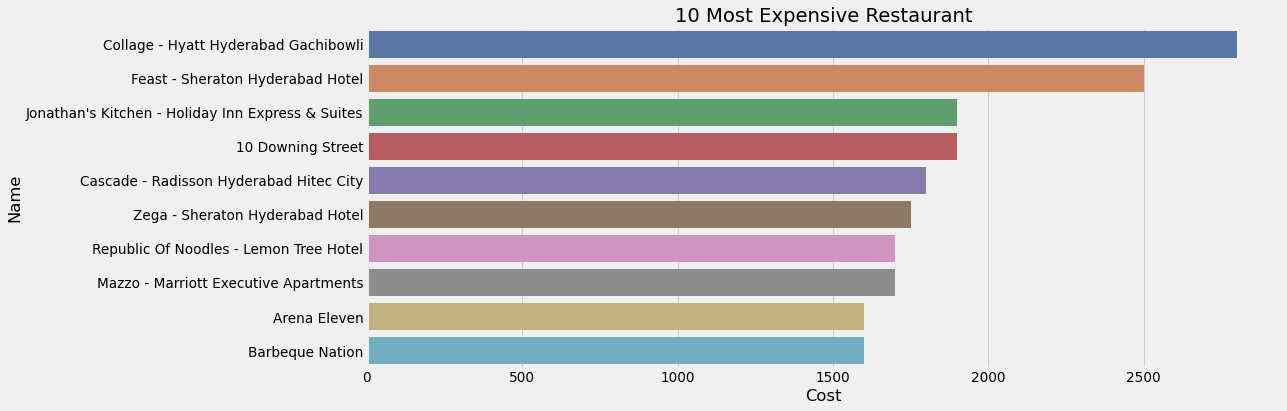

In [116]:
# top 10 most expensive restaurant
sns.barplot(x='Cost', y='Name', data=df1.sort_values(ascending=False, by='Cost')[:10],palette ='deep')
plt.title('10 Most Expensive Restaurant')
plt.show()

##### 1. Why did you pick the specific chart?

We chose column chart to visualize the top 10 expansive restaurant .Since it is a bivariate analysis of categorical data vs continuous data. Column chart is apt in this scenario.

##### 2. What is/are the insight(s) found from the chart?

Collage Hayatt Gachibowli restaurant is the most expansive restaurant in the market, followed by Feast - Sheraton Hydrabad hotel by a narrow margin. The other eight restaurants on the list are significantly less expensive than the first two.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we know from the earliar analysis that customers are going for affordable restaurant more often, So the expensive restaurant has very nishe customer base. If they reconsider their price point they could target the masses.

#### Chart - 8

In [117]:
#creating a dataframe top rated df 
top_rated_df= df_merged.groupby('Name',as_index=False)[['Rating','Cost']]\
            .mean().round(2).sort_values(ascending=False,by='Rating').head(15)

In [118]:
#creating a dataframe expensive rest df
expensive_rest_df= df_merged.groupby('Name',as_index=False)[['Rating','Cost']]\
            .mean().round(2).sort_values(ascending=False,by='Cost').head(15)

In [119]:
# defining a UdF for prettyprint spines
def prettyprint_spines(ax, right_border=True): 
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

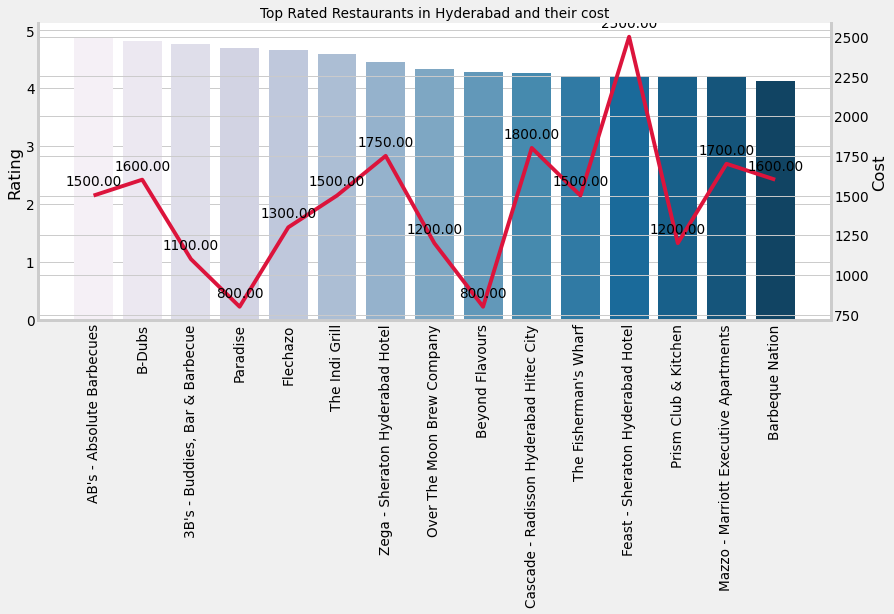

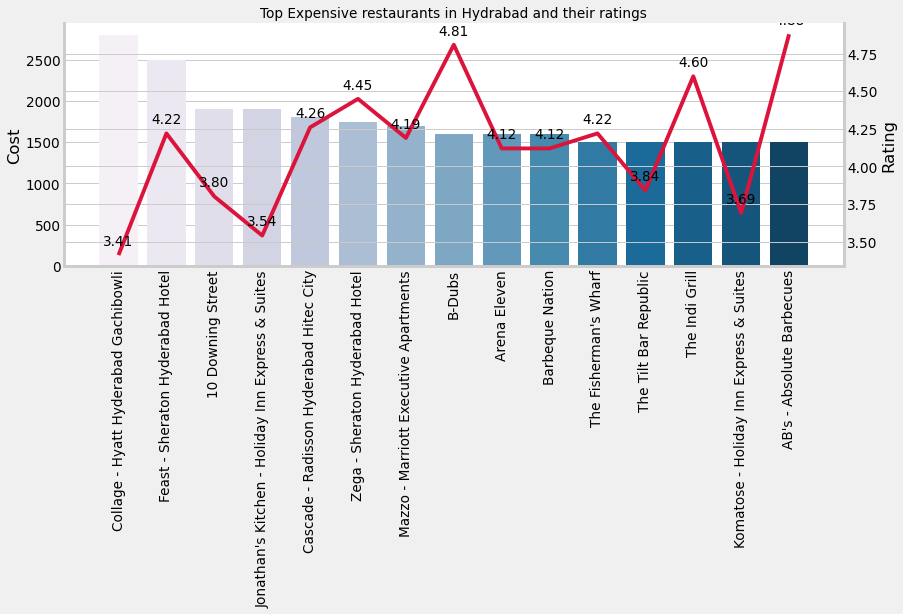

In [120]:
#vizualising top expensive restaurant and their ratings as well as most rated restaurant and their costs using bar chart and spines
fig, ax = plt.subplots(figsize=(13, 9))
sns.barplot(x='Name', y='Rating', data=top_rated_df, ax=ax, palette='PuBu')
ax2 = ax.twinx()
sns.lineplot(x='Name', y='Cost', data=top_rated_df, ax=ax2, color='crimson', sort=False)

ax.tick_params(axis='x', labelrotation=90)
prettyprint_spines(ax, right_border=True)
prettyprint_spines(ax2, right_border=True)
ax.xaxis.set_label_text("")

xs = np.arange(0,20,1)
ys =top_rated_df['Cost']

for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black',
                 clip_on=True)
ax.set_title('Top Rated Restaurants in Hyderabad and their cost', size=14)
ax.set_ylabel('Rating')
ax2.set_ylabel('Cost')
plt.tight_layout()
plt.show()
#Newly added code
#Expensive Restaurants in Hyderabad with ratings
fig, ax = plt.subplots(figsize=(13, 9))
sns.barplot(x='Name', y='Cost', data=expensive_rest_df,ax=ax, palette='PuBu')
ax2 = ax.twinx()
sns.lineplot(x='Name', y='Rating', data= expensive_rest_df, ax=ax2, color='crimson', sort=False)

ax.tick_params(axis='x', labelrotation=90)
prettyprint_spines(ax, right_border=True)
prettyprint_spines(ax2, right_border=True)
ax.xaxis.set_label_text("")

xs = np.arange(0,20,1)
ys = expensive_rest_df['Rating']

for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black',
                 clip_on=True)
ax.set_title('Top Expensive restaurants in Hydrabad and their ratings', size=14)
ax.set_ylabel('Cost')
ax2.set_ylabel('Rating')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We used a column chart with a spine chart on top to depict the Top Rated Restaurants in Hyderabad and their dining costs, as well as the Top Expensive Restaurants in Hyderabad and their reviewer ratings. Because this is a bivariate analysis of categorical vs. continuous data. In this case, a column chart and a line chart are appropriate.

##### 2. What is/are the insight(s) found from the chart?

* Some of the restaurants with very high reviews are not particularly pricey. Paradise Restaurant, for example, or Beyond Flavours Restaurant.
* Collage - Hyyat Hyderabad Gachibowli and Janathan's Kitchen are among Hyderabad's most costly restaurant, with a rating of 3.41 and 3.54 respectively. As a result, if quality is not maintained, this restaurant may lose business.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the analysis above any restaurant owner can determine the gaps between their price point and the average ratings they receive, based on that they can come to conclusion whether they need to level up the services they provide or they need to reconsider their price point to maintain their position in the market or to perform better than earlier.

### **Chart - 9 - Correlation Heatmap**

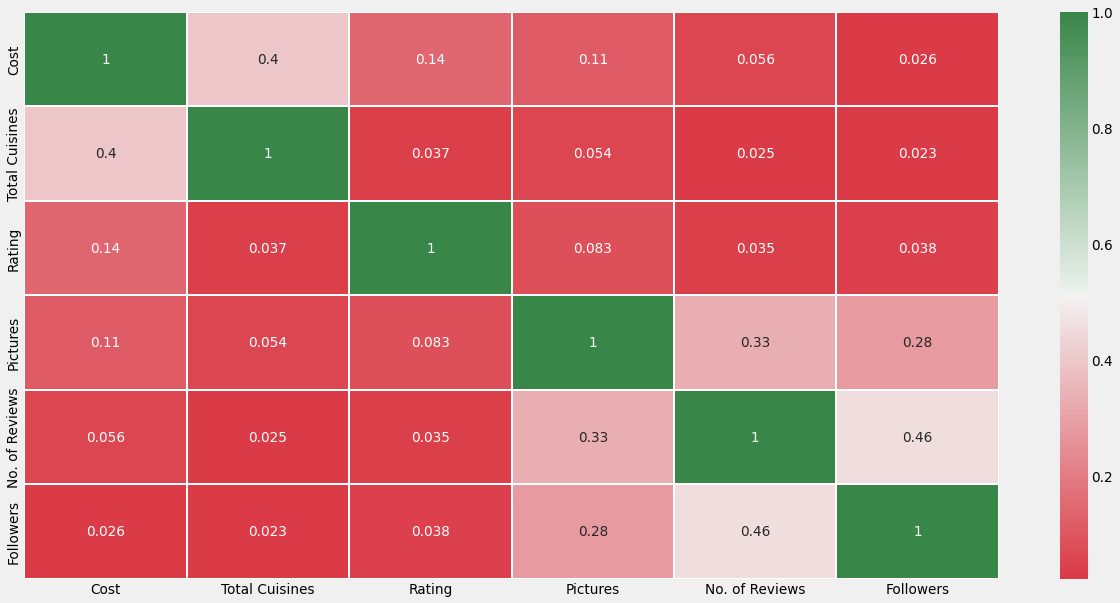

In [122]:
# Correlation Heatmap visualization code
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df_merged.corr(),ax = ax, annot=True, cmap=sns.diverging_palette(10, 133, as_cmap=True), linewidths=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

This graph is used to check the correlation between all the variables. We have used it to gain insight about the presence of multicollinearity in our dataset.

##### 2. What is/are the insight(s) found from the chart?

We can see that our dataset is free from the problem of Multicollinearity as none of the independent variables are correlated with each other.

### **Chart - 10 - Pair Plot**

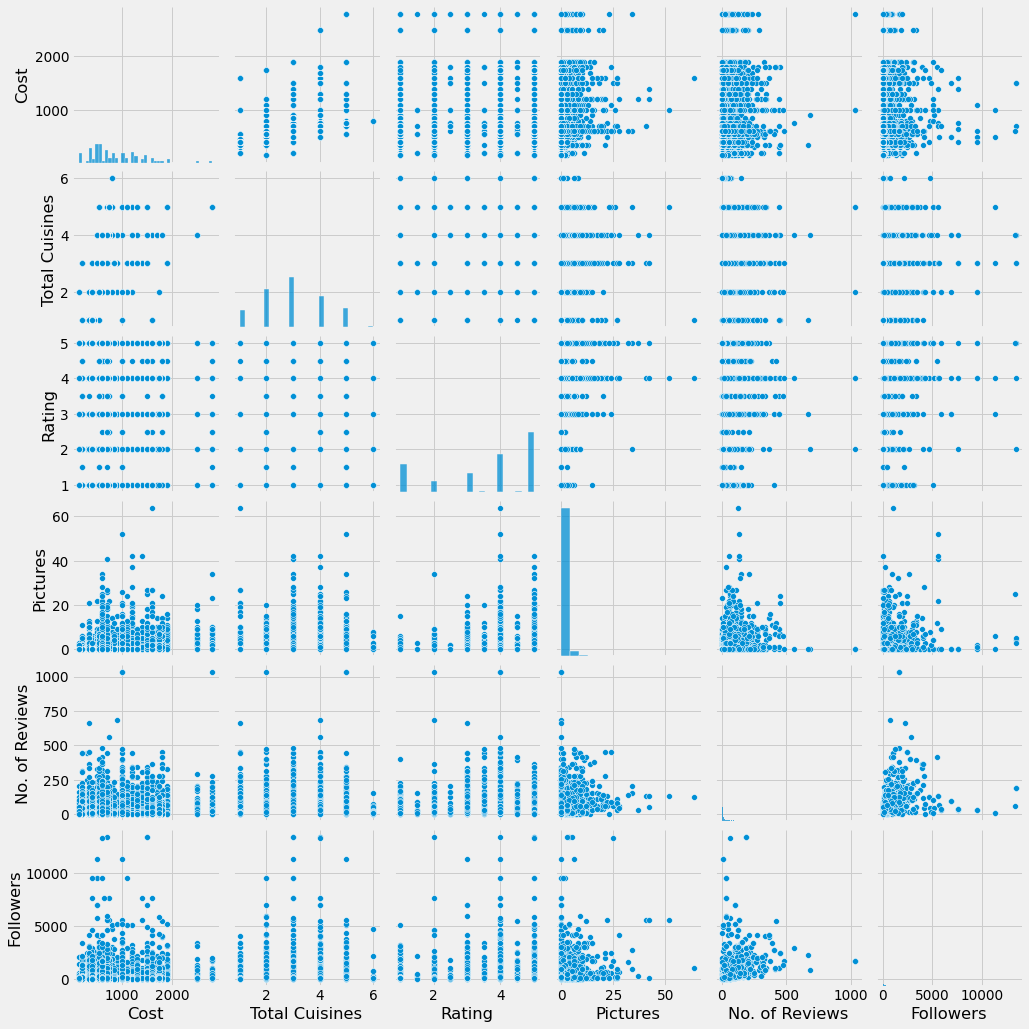

In [123]:
# Pair Plot visualization code
sns.pairplot(data=df_merged)

##### 1. Why did you pick the specific chart?

A pair plot allows us to see both distribution of single variables and relationships between two variables . Pair plots are a great method to identify trends for follow-up analysis.

##### 2. What is/are the insight(s) found from the chart?

We can see there is no significant correlation between the given features in the merged_df.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [124]:
#helper functions for hypothesis testing 
class statistic:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

In [125]:
#calculating variance
variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)

In [126]:
#creating instance of the class
statistic = statistic()

In [127]:
#creating a function 
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

In [128]:
zcdf = lambda x: norm(0,1).cdf(x)

In [129]:
def p_value(z,tailed):
  z=round(zcdf(z),10)
  if tailed=='l':
    return z
  elif tailed == 'r':
    return 1-z
  elif tailed == 'd':
    if z>0.5:
      return 2*(1-z)
    else:
      return 2*z
  else:
    return np.nan

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


**Lets formualte our hypothesis where we considerd that mean cost is 900.**
* **Null Hypothesis H0** : ℳ = 900   , Mean cost is 900
* **Alternative Hypothesis H1** : ℳ !=900  , Mean cost is not 900

#### 2. Perform an appropriate statistical test.

In [130]:
# Perform Statistical Test to obtain P-Value
relevant_df = df1['Cost'].copy()
hypothesis_mean = 900
size = 50

relevant_df = relevant_df[:55]
std = np.std(relevant_df)
sample_mean = np.mean(relevant_df)
z = statistic.mean(hypothesis_mean,sample_mean,size,std)
p = p_value(z,'d') #two tailed test
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.5919663128.


Based on the test performed above we can say that mean cost of the population is not 900.

##### Which statistical test have you done to obtain P-Value?

We have calculated z-score for mean when standard deviation was known to obtain p-value, We have conducted two tailed test in this case.

##### Why did you choose the specific statistical test?

A z-test is used in hypothesis testing to evaluate whether a finding or association is statistically significant or not. In particular, it tests whether two means are the same (the null hypothesis). A z-test can only be used if the population standard deviation is known and the sample size is 30 data points or larger.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Average rating by the cust;omer is 3.5**
* **Null Hypothesis H0** : ℳ = 3.5   , Mean duration is 3.5
* **Alternative Hypothesis H1** : ℳ !=3.5 , Mean duration is not 3.5

#### 2. Perform an appropriate statistical test.

In [131]:
# Perform Statistical Test to obtain P-Value
relevant_df = df2['Rating'].copy()
hypothesis_mean = 3.5
size = 150

relevant_df = relevant_df[:150]
std = np.std(relevant_df)
sample_mean = np.mean(relevant_df)
z = statistic.mean(hypothesis_mean,sample_mean,size,std)
p = p_value(z,'d') #two tailed test
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0


Based on the test performed above we can say that we can say that mean rating is not 3.5 .

##### Which statistical test have you done to obtain P-Value?

We have calculated z-score for mean when standard deviation was known to obtain p-value, We have conducted two tailed test in this case.

##### Why did you choose the specific statistical test?

A z-test is used in hypothesis testing to evaluate whether a finding or association is statistically significant or not. In particular, it tests whether two means are the same (the null hypothesis). A z-test can only be used if the population standard deviation is known and the sample size is 30 data points or larger.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis(H0)** - Restaurants which serves greater variety of cuisines are costly.
*  **Alternative Hypothesis(H1)** - There is no relation between no. of cuisines and cost.

#### 2. Perform an appropriate statistical test.

In [132]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency
  
# defining the table
data = [df1['Total Cuisines'], df1['Cost']]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (failed to reject H0)')

p value is 0.6644145542522853
Independent (failed to reject H0)


##### Which statistical test have you done to obtain P-Value?

A chi-square test is used in statistics to test the independence of two events.

##### Why did you choose the specific statistical test?

A chi-square test is used in statistics to test the independence of two variables. Our aim was to know whether age is related to the response variable or not so we used this test here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [46]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [47]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [48]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [49]:
# Expand Contraction

#### 2. Lower Casing

In [50]:
# Lower Casing

#### 3. Removing Punctuations

In [51]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [52]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [53]:
# Remove Stopwords

In [54]:
# Remove White spaces

#### 6. Rephrase Text

In [55]:
# Rephrase Text

#### 7. Tokenization

In [56]:
# Tokenization

#### 8. Text Normalization

In [57]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [58]:
# POS Taging

#### 10. Text Vectorization

In [59]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [60]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [61]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [62]:
# Transform Your data

### 6. Data Scaling

In [63]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [64]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [65]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [66]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [67]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [68]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [70]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [71]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [72]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [73]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [74]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [75]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [76]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***